In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)


In [41]:
data = pd.read_csv (r'./Vanessa/20231008_Tau_table_test.csv') 
data

Entry 1 Entry 2                  Entry 3 Unnamed: 3 Unnamed: 4  \
0        HL      JZ                       HL      check      check   
1        HL      JZ                       HL      check      check   
2        JZ      TM                       HL      check      check   
3        JZ      TM                       HL         no         no   
4        JZ      hl                       HL      check      check   
..      ...     ...                      ...        ...        ...   
277      VL      DS                      NaN        NaN        NaN   
278      VL      DS                      NaN        NaN        NaN   
279      VL      DS                      NaN        NaN        NaN   
280      DS     NaN  needs a second reviewer        NaN        NaN   
281      VL      DS      keep? let's discuss        NaN        NaN   

                 Reference                          Strategy  \
0        Asuni et al. 2007               active immunization   
1    Selenica et al. 2014b               active immunization   
2           Bi et al. 2011               active immunization   
3       Boimel et al. 2010               active immunization   
4      Richter et al. 2014               active immunization   
..                     ...                               ...   
277             Zhong 2023                 Other (Flavonoid)   
278               Zhu 2022        Immune Response Modulation   
279         Damianich 2021  Other (correct Tau-mis splicing)   
280   Espindola et al 2018  Other (correct Tau-mis splicing)   
281        Bijttebier 2023             Tau Enzyme Modulation   

                                             Treatment Synonymns  \
0                        Tau379-408 pS396/S404 peptide       NaN   
1                             P301L tau (4R0N) peptide       NaN   
2                        Tau395-406 pS396/S404 peptide       NaN   
3                               Various p-tau peptides       NaN   
4                               Various p-tau peptides       NaN   
..                                                 ...       ...   
277                                     quercetagitrin       NaN   
278         Crry shRNA (complement regulatory protein)       NaN   
279  PTM4R (pre-trans-splicing molecule able to bin...       NaN   
280  PTM4R (RNA trans-splicing to modulate tau exon...       NaN   
281                  Thiamet G (O-GlcNAcase inhibitor)       NaN   

    Clinical trials 'Tauopathies' Registration numbers  \
0                              No                  NaN   
1                              No                  NaN   
2                              No                  NaN   
3                              No                  NaN   
4                              No                  NaN   
..                            ...                  ...   
277                            No                  NaN   
278                            No                  NaN   
279                            No                  NaN   
280                            No                  NaN   
281                            No                  NaN   

    Treatment Start Age (mo)   Treatment End Age (mo)  \
0           2-5 mo or 2-8 mo                      NaN   
1                    5-10 mo                      NaN   
2     4-5 or 8-9 or 18-19 mo                      NaN   
3                    4-12 mo                      NaN   
4           2.5 to 5/8/12 mo                      NaN   
..                       ...                      ...   
277                        6                        9   
278                        6  6, mice tested  at 8 mo   
279                        3                        3   
280                    3-Feb                   12-Oct   
281                        1                      5.5   

          Treatment Duration (mo) (1mo=28d)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3      

In [42]:
#Three different colors
#NT = grey
#NE = pink
#DE = green
#For clinical trials, yes is blue and no is orange



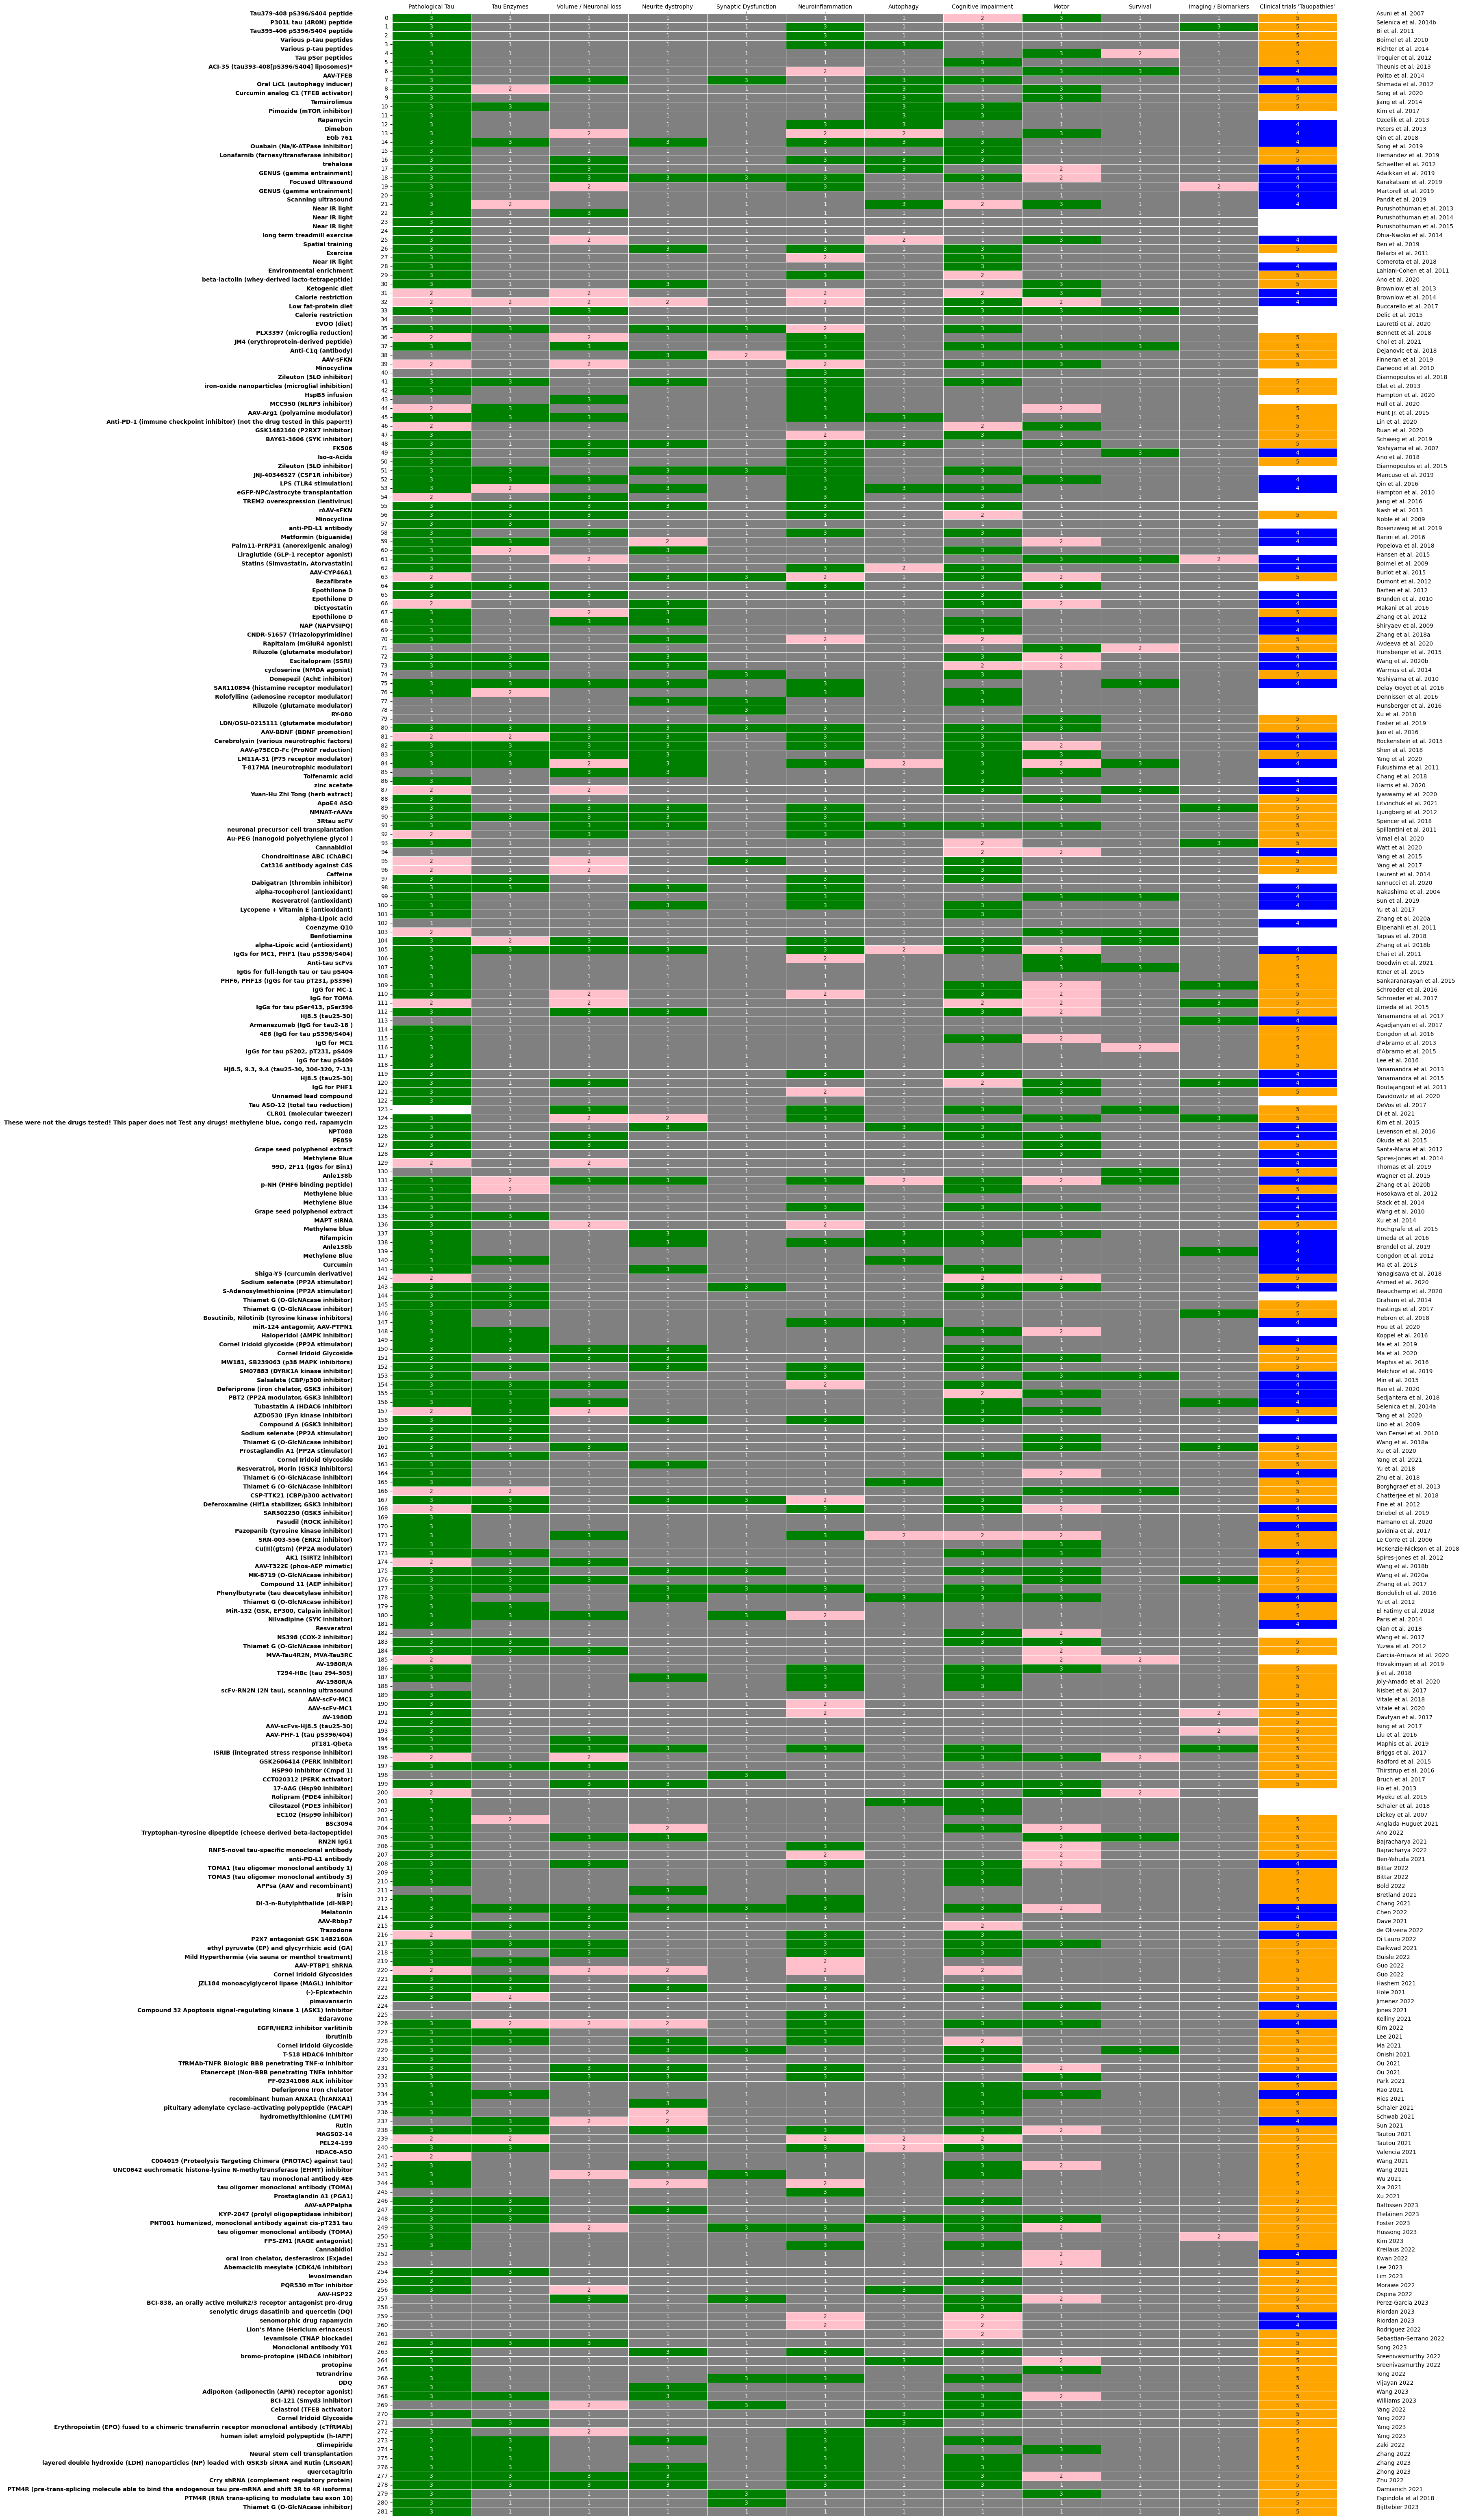

In [43]:
# 2. Select the relevant columns
subset = data[["Pathological Tau", "Tau Enzymes", "Volume / Neuronal loss", "Neurite dystrophy", 
               "Synaptic Dysfunction", "Neuroinflammation", "Autophagy", "Cognitive impairment", 
               "Motor", "Survival", "Imaging / Biomarkers", "Clinical trials 'Tauopathies'"]].copy()

# Extract 'Treatment' and 'Reference' data for annotations
treatments = data['Treatment'].tolist()
references = data['Reference'].tolist()

#Three different colors
#NT = grey
#NE = pink
#DE = green
#For clinical trials, yes is blue and no is orange

# 3. Convert the textual values in the columns to numeric values
numeric_mapping = {
    'NT': 1,
    'NE': 2,
    'DE': 3,
    'Yes': 4,
    'No': 5
}
for column in subset.columns:
    subset[column] = subset[column].map(numeric_mapping)

# 4. Create a custom colormap
colors = ['grey', 'pink', 'green', 'green','blue', 'orange']
cmap = mcolors.ListedColormap(colors)

# 5. Plot the heatmap
fig, ax = plt.subplots(figsize=(30, 80))  # Adjusted size for better visualization
sns.heatmap(data=subset, 
            annot=subset.replace(numeric_mapping),
            cmap=cmap,
            cbar=False,
            linewidths=.5,
            ax=ax)

# Move column titles to the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Add 'Treatment' annotations on the left
for i, treatment in enumerate(treatments):
    ax.text(-0.5, i, treatment, va='center', ha='right', color='black', weight='bold')
    
# Add 'Reference' annotations on the right
for i, reference in enumerate(references):
    ax.text(len(subset.columns) + 0.5, i, reference, va='center', ha='left', color='black')

plt.show()

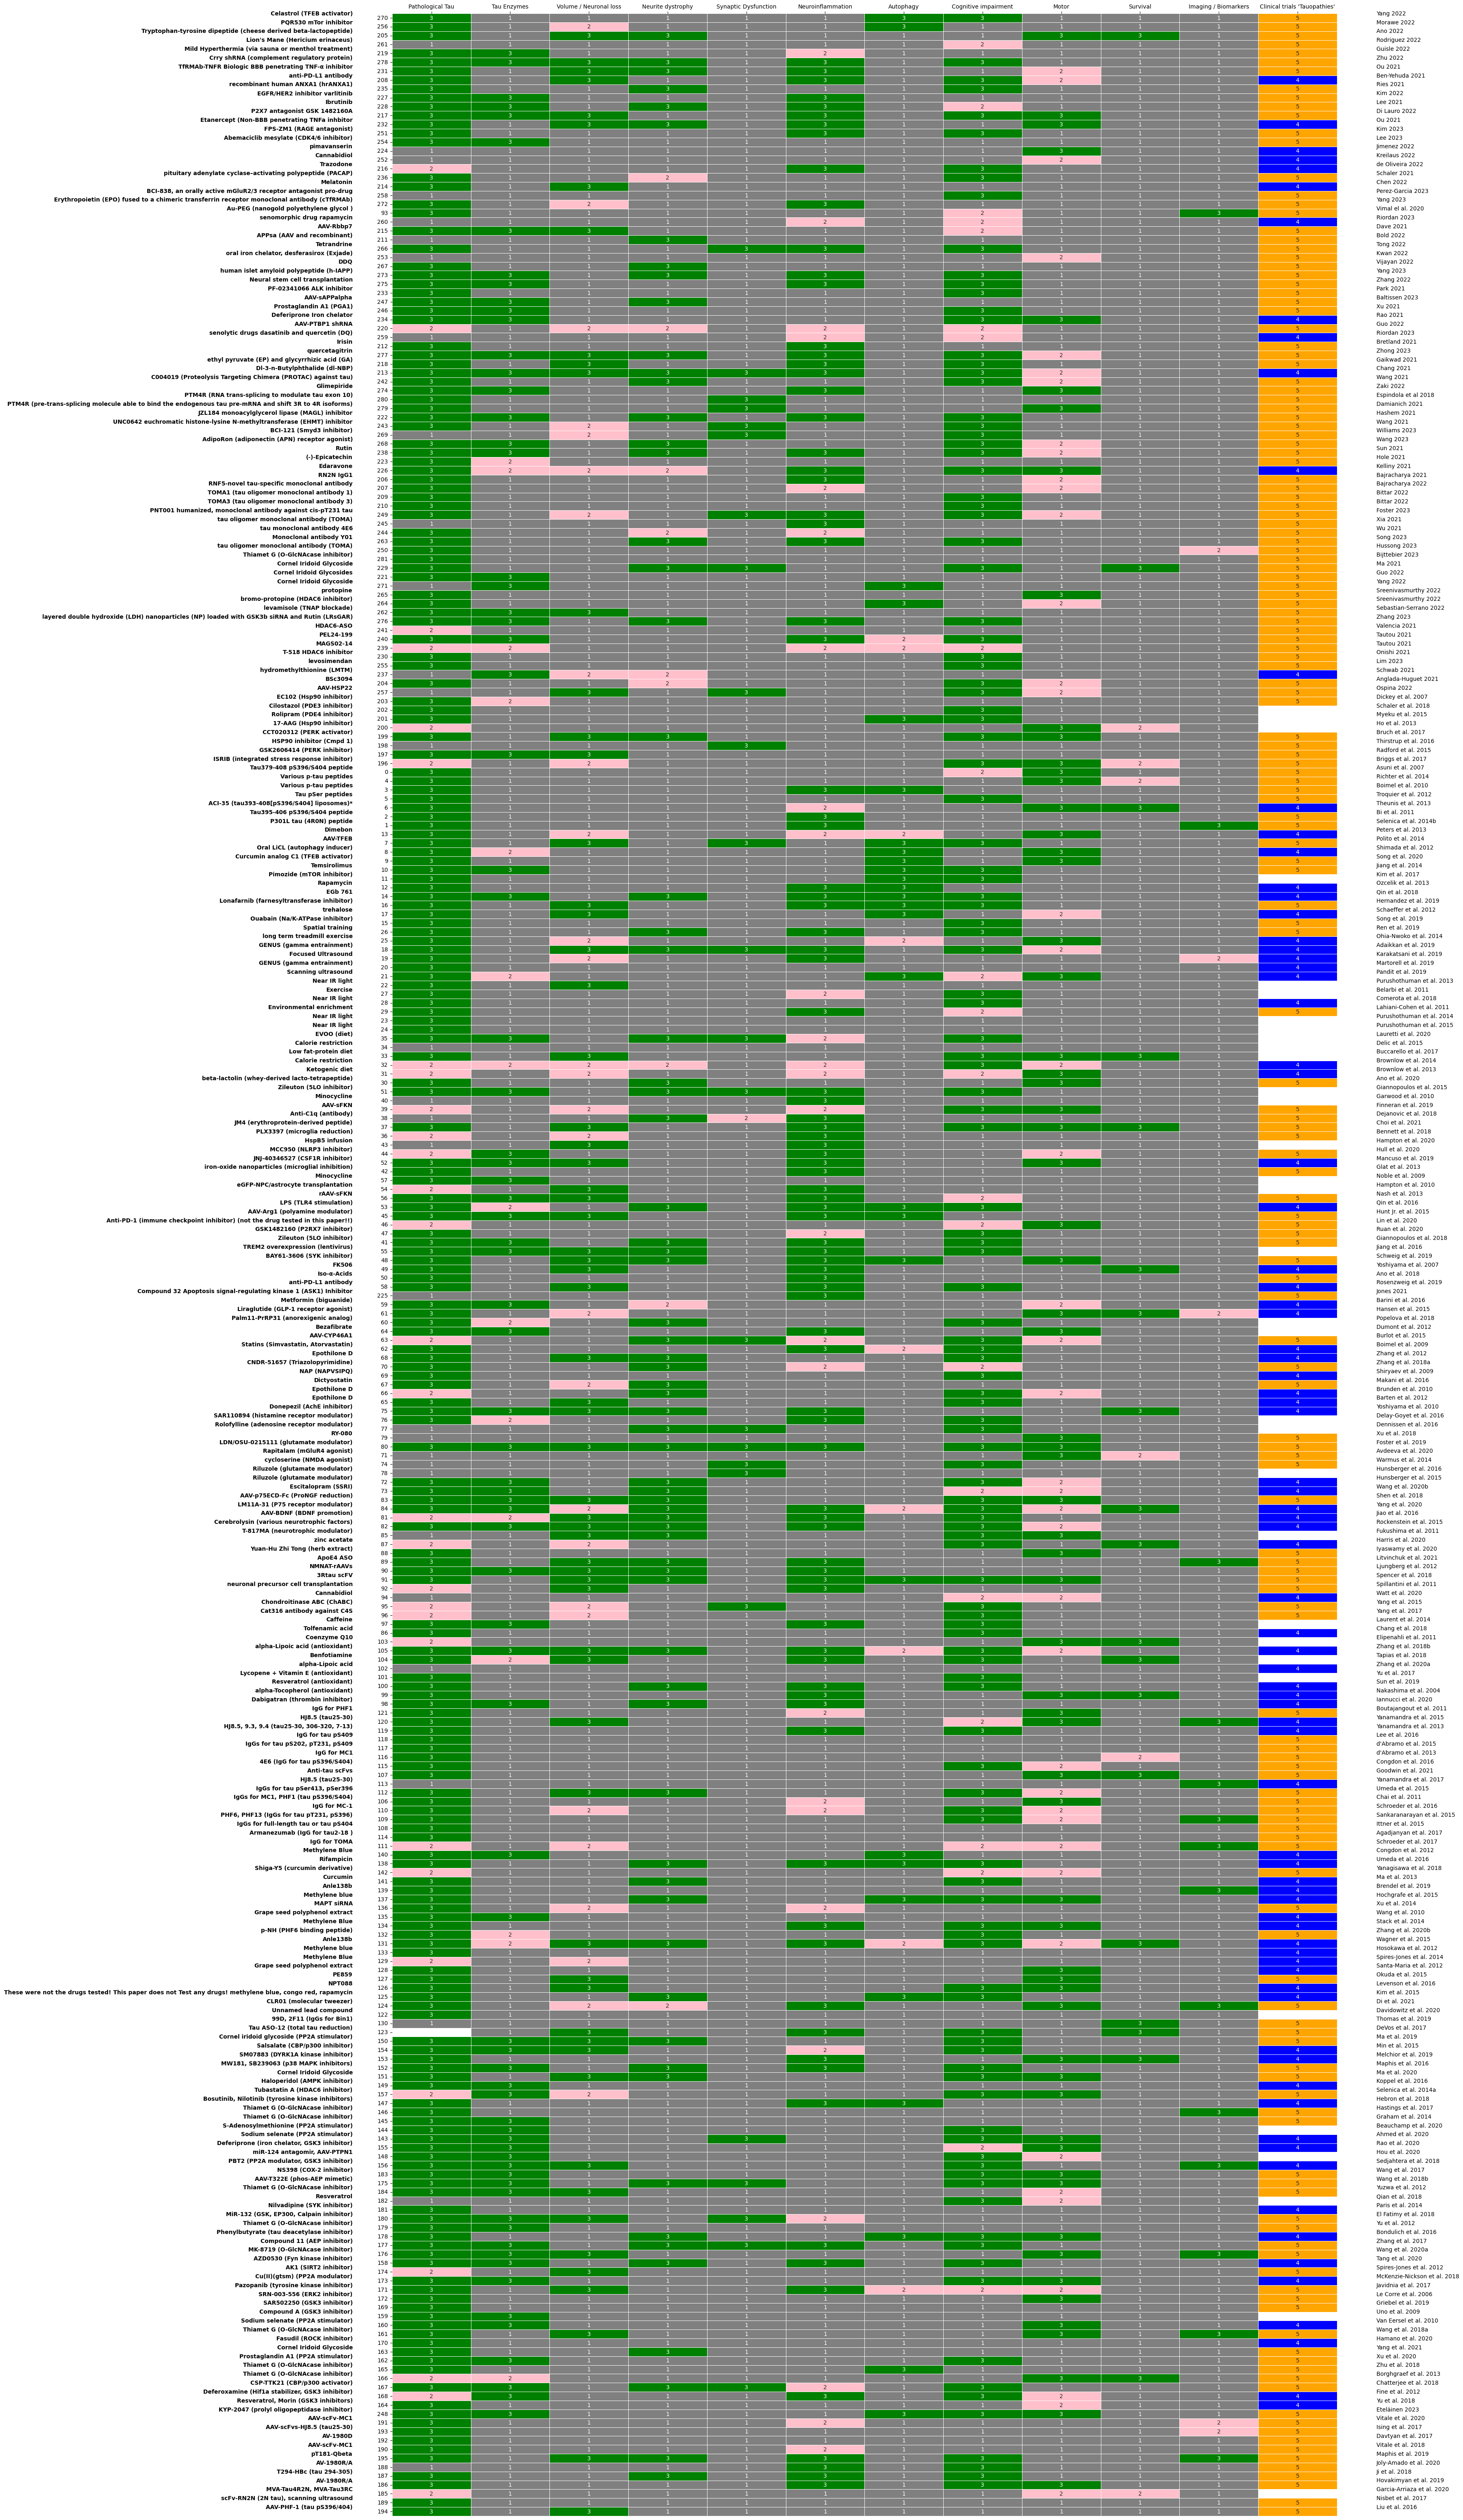

In [44]:
data = data.sort_values(by='Strategy')

# 2. Select the relevant columns
subset = data[["Pathological Tau", "Tau Enzymes", "Volume / Neuronal loss", "Neurite dystrophy", 
               "Synaptic Dysfunction", "Neuroinflammation", "Autophagy", "Cognitive impairment", 
               "Motor", "Survival", "Imaging / Biomarkers", "Clinical trials 'Tauopathies'"]].copy()

# Extract 'Treatment' and 'Reference' data for annotations
treatments = data['Treatment'].tolist()
references = data['Reference'].tolist()

#Three different colors
#NT = grey
#NE = pink
#DE = green
#For clinical trials, yes is blue and no is orange

# 3. Convert the textual values in the columns to numeric values
numeric_mapping = {
    'NT': 1,
    'NE': 2,
    'DE': 3,
    'Yes': 4,
    'No': 5
}
for column in subset.columns:
    subset[column] = subset[column].map(numeric_mapping)

# 4. Create a custom colormap
colors = ['grey', 'pink', 'green', 'green','blue', 'orange']
cmap = mcolors.ListedColormap(colors)

# 5. Plot the heatmap
fig, ax = plt.subplots(figsize=(30, 80))  # Adjusted size for better visualization
sns.heatmap(data=subset, annot=subset.replace(numeric_mapping), cmap=cmap, cbar=False, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
for i, (treatment, reference) in enumerate(zip(treatments, references)):
    ax.text(-0.5, i, treatment, va='center', ha='right', color='black', weight='bold')
    ax.text(len(subset.columns) + 0.5, i, reference, va='center', ha='left', color='black')

plt.show()